# Visualization of Learning

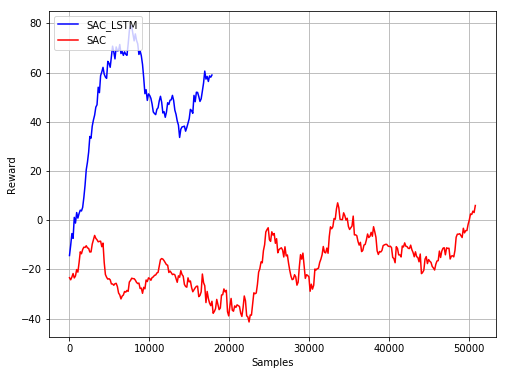

In [2]:
# high-dimensional reacher
import numpy as np
import matplotlib.pyplot as plt

def smooth(y, radius=10, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]


def plot(x, data, color, label):
    y_m=np.mean(data, axis=0)
    y_std=np.std(data, axis=0)
    y_upper=y_m+y_std
    y_lower=y_m-y_std
    plt.fill_between(
    x, list(y_lower), list(y_upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
)
    plt.plot(x, list(y_m), color=color, label=label)
    
plt.figure(figsize=(8,6))
file_pre = './'
y=np.load(file_pre+'rewards_lstm.npy')
y_=np.load(file_pre+'rewards.npy')

x=np.arange(len(y))
x_=np.arange(len(y_))
episode_length = 150
x = episode_length*x
x_ = episode_length*x_
plt.plot(x, smooth(y), label = 'SAC_LSTM', color='b')
plt.plot(x_, smooth(y_), label = 'SAC', color='r')

plt.xlabel('Samples')
plt.ylabel('Reward')
# plt.ylim(0)
leg= plt.legend( loc=2)
plt.grid()
plt.savefig('reward_compare_sac.pdf')
plt.show()

620


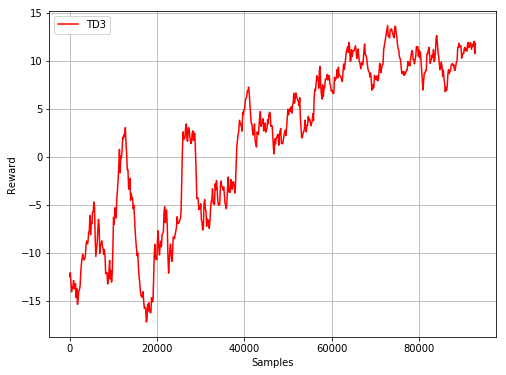

In [4]:
# high-dimensional reacher
import numpy as np
import matplotlib.pyplot as plt

def smooth(y, radius=10, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]


def plot(x, data, color, label):
    y_m=np.mean(data, axis=0)
    y_std=np.std(data, axis=0)
    y_upper=y_m+y_std
    y_lower=y_m-y_std
    plt.fill_between(
    x, list(y_lower), list(y_upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
)
    plt.plot(x, list(y_m), color=color, label=label)
    
plt.figure(figsize=(8,6))
file_pre = './'
y=np.load(file_pre+'rewards_lstm.npy')
y_=np.load(file_pre+'rewards_td3.npy')

x=np.arange(len(y))
x_=np.arange(len(y_))
print(len(y_))
episode_length = 150
x = episode_length*x
x_ = episode_length*x_
# plt.plot(x, smooth(y), label = 'SAC_LSTM', color='b')
plt.plot(x_, smooth(y_), label = 'TD3', color='r')

plt.xlabel('Samples')
plt.ylabel('Reward')
# plt.ylim(0)
leg= plt.legend( loc=2)
plt.grid()
plt.savefig('reward_compare_td3.pdf')
plt.show()